In [1]:
!pip install kaggle

You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import os
import shutil

# Create folder
kaggle_dir = os.path.expanduser('~/.kaggle')
os.makedirs(kaggle_dir, exist_ok=True)

# Move your kaggle.json file (make sure it's in the same folder as this script)
shutil.copy('kaggle.json', os.path.join(kaggle_dir, 'kaggle.json'))

# Optional: set file permissions (safe to skip on Windows)
os.chmod(os.path.join(kaggle_dir, 'kaggle.json'), 0o600)

## Importing Files

In [3]:
!kaggle competitions download -c dogs-vs-cats --force


  0%|          | 0.00/812M [00:00<?, ?B/s]
  6%|5         | 48.0M/812M [00:00<00:01, 464MB/s]
 11%|#1        | 93.0M/812M [00:00<00:01, 406MB/s]
 19%|#9        | 156M/812M [00:00<00:01, 511MB/s] 
 26%|##5       | 211M/812M [00:00<00:01, 534MB/s]
 37%|###6      | 300M/812M [00:00<00:00, 672MB/s]
 45%|####5     | 366M/812M [00:00<00:00, 631MB/s]
 53%|#####2    | 428M/812M [00:00<00:00, 613MB/s]
 64%|######3   | 516M/812M [00:00<00:00, 702MB/s]
 72%|#######2  | 585M/812M [00:01<00:00, 629MB/s]
 80%|#######9  | 647M/812M [00:01<00:00, 589MB/s]
 87%|########6 | 705M/812M [00:01<00:00, 579MB/s]
 94%|#########3| 762M/812M [00:01<00:00, 547MB/s]
100%|##########| 812M/812M [00:01<00:00, 569MB/s]


In [4]:
!dir

 Volume in drive C is Windows-SSD
 Volume Serial Number is A848-0545

 Directory of C:\ML Projects\Dog Vs Cat Classification

18-06-2025  10:33    <DIR>          .
19-05-2025  01:24    <DIR>          ..
19-05-2025  04:31    <DIR>          .ipynb_checkpoints
10-06-2025  19:06             2,358 app.py
19-05-2025  03:33             7,726 catt.jpg
19-05-2025  11:46    <DIR>          cat_dog_classifier
19-05-2025  04:20         9,318,352 cat_dog_classifier.h5
19-05-2025  03:33            23,078 doggo.jpg
11-12-2019  04:19       851,576,689 dogs-vs-cats.zip
18-06-2025  10:33            18,125 DogvsCat.ipynb
19-05-2025  01:06    <DIR>          Image Resize
18-05-2025  19:19                68 kaggle.json
18-06-2025  10:14            88,903 sampleSubmission.csv
20-05-2025  01:19             5,081 test.py
18-06-2025  10:14       284,321,224 test1.zip
19-05-2025  11:37    <DIR>          tf-env
18-05-2025  20:06    <DIR>          train
18-06-2025  10:14       569,546,721 train.zip
19-05-2025  04:0

## Extracting the file

In [5]:
from zipfile  import ZipFile
dataset = 'dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as i:
    i.extractall()
    print('The dataset is extracted')


The dataset is extracted


In [6]:
from zipfile  import ZipFile
dataset = 'train.zip'

with ZipFile(dataset, 'r') as i:
    i.extractall()
    print('The training set is extracted')


The training set is extracted


## Counting the number of files in training set

In [7]:
import os
paths, dirs, files = next(os.walk('train'))
len(files)

25000

In [8]:
file_names = os.listdir('train')
print(file_names)

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg', 'cat.10008.jpg', 'cat.10009.jpg', 'cat.1001.jpg', 'cat.10010.jpg', 'cat.10011.jpg', 'cat.10012.jpg', 'cat.10013.jpg', 'cat.10014.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10017.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.1002.jpg', 'cat.10020.jpg', 'cat.10021.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10026.jpg', 'cat.10027.jpg', 'cat.10028.jpg', 'cat.10029.jpg', 'cat.1003.jpg', 'cat.10030.jpg', 'cat.10031.jpg', 'cat.10032.jpg', 'cat.10033.jpg', 'cat.10034.jpg', 'cat.10035.jpg', 'cat.10036.jpg', 'cat.10037.jpg', 'cat.10038.jpg', 'cat.10039.jpg', 'cat.1004.jpg', 'cat.10040.jpg', 'cat.10041.jpg', 'cat.10042.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10045.jpg', 'cat.10046.jpg', 'cat.10047.jpg', 'cat.10048.jpg', 'cat.10049.jpg', 'cat.1005.jpg'

## Importing the libraries

In [28]:
# %pip install --upgrade matplotlib 
# %pip install --upgrade scikit-learn
# %pip install --upgrade opencv-python
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2

## Displaying the images
We can also convert RGB images into grayscale images for faster processing

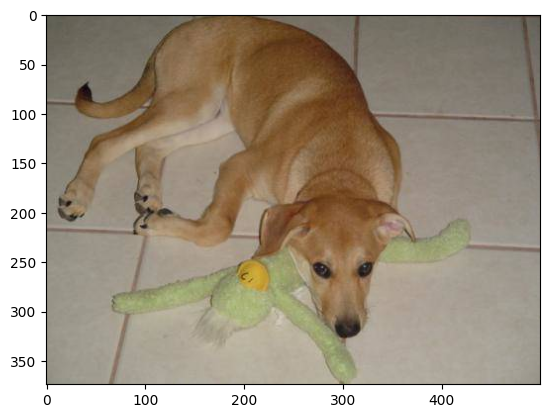

In [11]:
img = mpimg.imread('train/dog.6853.jpg')
imgplt = plt.imshow(img)

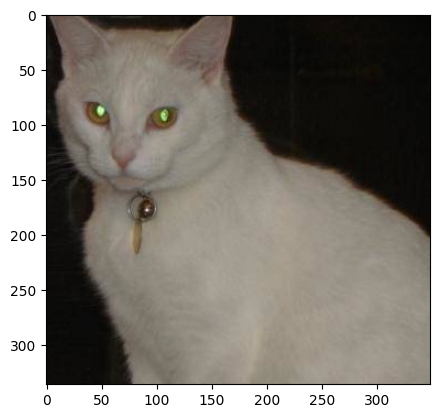

In [12]:
img = mpimg.imread('train/cat.10023.jpg')
imgplt = plt.imshow(img)

## Resizing Images

In [21]:
os.mkdir('Image Resize')

# filenames = os.listdir('train')
# count = 0
# count2 = 0

# for i in range(12501,13501):
#     fname = filenames[i]

#     if fname[0:3] == 'dog':
#         count += 1;
#     if fname[0:3] == 'cat':
#         count2 += 1;

# count,count2

In [16]:
for i in range(1000):
    fname = os.listdir('train')[i]
    img_path = 'train/'+fname

    img = Image.open(img_path)
    img = img.resize((224,224))
    img = img.convert('RGB')

    new_img_path = 'Image Resize/' + fname
    img.save(new_img_path)

In [17]:
for i in range(12501,13501):
    fname = os.listdir('train')[i]
    img_path = 'train/'+fname

    img = Image.open(img_path)
    img = img.resize((224,224))
    img = img.convert('RGB')

    new_img_path = 'Image Resize/' + fname
    img.save(new_img_path)

## Displaying Resized Images

In [18]:
file_names = os.listdir('Image Resize')
print(file_names)

['.ipynb_checkpoints', 'cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg', 'cat.10008.jpg', 'cat.10009.jpg', 'cat.1001.jpg', 'cat.10010.jpg', 'cat.10011.jpg', 'cat.10012.jpg', 'cat.10013.jpg', 'cat.10014.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10017.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.1002.jpg', 'cat.10020.jpg', 'cat.10021.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10026.jpg', 'cat.10027.jpg', 'cat.10028.jpg', 'cat.10029.jpg', 'cat.1003.jpg', 'cat.10030.jpg', 'cat.10031.jpg', 'cat.10032.jpg', 'cat.10033.jpg', 'cat.10034.jpg', 'cat.10035.jpg', 'cat.10036.jpg', 'cat.10037.jpg', 'cat.10038.jpg', 'cat.10039.jpg', 'cat.1004.jpg', 'cat.10040.jpg', 'cat.10041.jpg', 'cat.10042.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10045.jpg', 'cat.10046.jpg', 'cat.10047.jpg', 'cat.10048.jpg', 'cat.1004

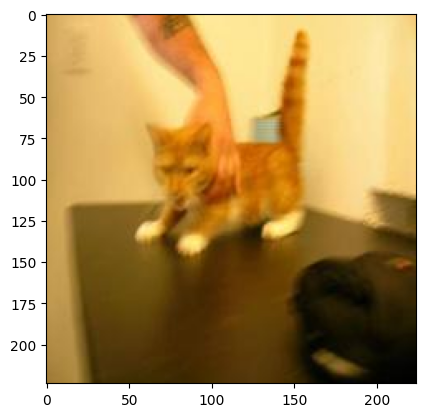

In [19]:
img = mpimg.imread('Image Resize/cat.0.jpg')
imgplt = plt.imshow(img)

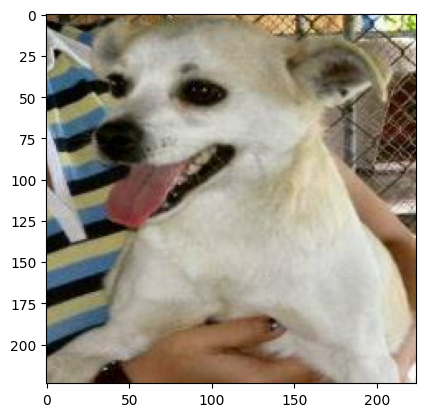

In [20]:
img = mpimg.imread('Image Resize/dog.10420.jpg')
imgplt = plt.imshow(img)

## Creating Labels

In [22]:
filename = os.listdir('Image Resize')
labels = []

for i in range (2000):
    fname = filename[i]
    if fname[0:3] == 'dog':
        labels.append(1)
    else:
        labels.append(0)

# labels[1056:1065]
values,counts = np.unique(labels,return_counts = True)
print(values,counts)
len(filename)

# files = os.listdir('Image Resize')
# os.remove('Image Resize/'+files[1000])

[0 1] [1001  999]


2001

## Converting resized images to numpy arrays

In [29]:
import glob

img_ext = ['png','jpg']
files = []

[files.extend(glob.glob('Image Resize/' + '*.' + i)) for i in img_ext]
for i in files:
    img = cv2.imread(i)
    if img is None:
        print(f"Failed to load: {i}")
dog_cat_imgs = np.asarray([cv2.imread(file) for file in files])

In [30]:
len(dog_cat_imgs)

2000

## Train Test Split

In [31]:
X = dog_cat_imgs
Y = np.asarray(labels)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

## Scaling

In [32]:
X_trained_scaled = X_train/255
X_test_scaled = X_test/255

## Building Neural Network

In [34]:
import tensorflow as tf
import tensorflow_hub as hub

%pip install tf_keras
import tf_keras

Note: you may need to restart the kernel to use updated packages.


In [35]:
mobilenet_model = 'https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/tf2-preview-feature-vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape = (224,224,3), trainable = False)           

In [36]:
num_of_classes = 2

model = tf_keras.Sequential([

    pretrained_model,
    tf_keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [37]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['acc']
)

## Training the model

In [38]:
model.fit(X_trained_scaled,Y_train,epochs = 5)

Epoch 1/5



50/50 [==============================] - 21s 318ms/step - loss: 0.2052 - acc: 0.9150
Epoch 2/5
50/50 [==============================] - 15s 303ms/step - loss: 0.0685 - acc: 0.9756
Epoch 3/5
50/50 [==============================] - 15s 310ms/step - loss: 0.0520 - acc: 0.9844
Epoch 4/5
50/50 [==============================] - 15s 297ms/step - loss: 0.0433 - acc: 0.9881
Epoch 5/5
50/50 [==============================] - 15s 301ms/step - loss: 0.0348 - acc: 0.9912


## Model Evaluation

In [39]:
score,acc = model.evaluate(X_test_scaled,Y_test)
score,acc

13/13 [==============================] - 5s 286ms/step - loss: 0.0788 - acc: 0.9600


(0.07883229851722717, 0.9599999785423279)

## Predictive System

Path of the image to be predicted catt.jpg


1/1 [==============================] - 0s 302ms/step
[[ 2.640368  -5.1492453]]
0
The image represents a Cat


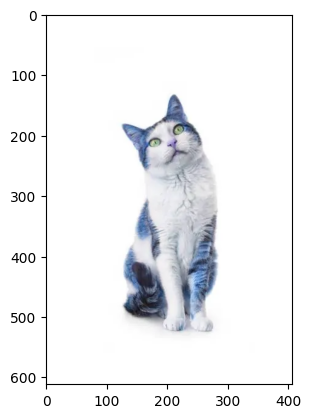

In [42]:
input_img_path = input('Path of the image to be predicted')
input_img = cv2.imread(input_img_path)
# cv2_imshow(input_img)
plt.imshow(input_img)

input_img_resize = cv2.resize(input_img,(224,224))
input_img_scaled = input_img_resize/255
img_reshaped = np.reshape(input_img_scaled, [1,224,224,3])

img_prediction = model.predict(img_reshaped)
print(img_prediction)
img_prediction_label = np.argmax(img_prediction)
print(img_prediction_label)

if img_prediction_label == 0:
    print('The image represents a Cat')
else:
    print('The image represents a Dog')

## Saving the model

In [44]:
model.save('Trained Model.keras')
# model.save("cat_dog_classifier.h5")
# model.save("cat_dog_classifier")

## Loading the model

In [45]:
# from tensorflow import keras
# model = keras.models.load_model('Trained Model.keras')
#                                  # custom_objects={'KerasLayer': hub.KerasLayer})
# model = load_model('cat_dog_classifier.h5')

Path of the image to be predicted doggo.jpg


1/1 [==============================] - 0s 346ms/step
[[-2.3532872  2.347226 ]]
1
The image represents a Dog


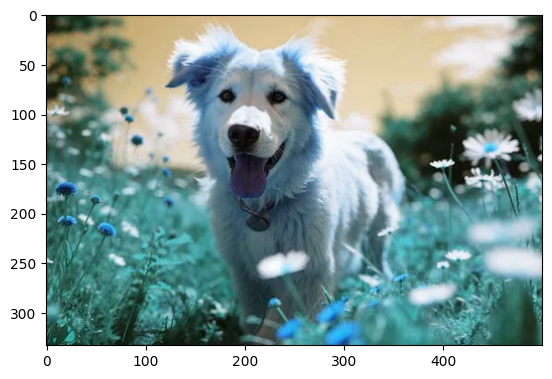

In [46]:
input_img_path = input('Path of the image to be predicted')
input_img = cv2.imread(input_img_path)
# cv2_imshow(input_img)
plt.imshow(input_img)

input_img_resize = cv2.resize(input_img,(224,224))
input_img_scaled = input_img_resize/255
img_reshaped = np.reshape(input_img_scaled, [1,224,224,3])

img_prediction = model.predict(img_reshaped)
print(img_prediction)
img_prediction_label = np.argmax(img_prediction)
print(img_prediction_label)

if img_prediction_label == 0:
    print('The image represents a Cat')
else:
    print('The image represents a Dog')